In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf
import pandas as pd

In [13]:
tickers_list=['AMZN','IBM','2330.TW']

In [14]:
data=pd.DataFrame(columns=tickers_list)

In [16]:
for ticker in tickers_list:
    df = yf.download(ticker, period='10y', interval='1d', auto_adjust=False)
    if 'Adj Close' in df.columns:
        data[ticker] = df['Adj Close']
    else:
        print(f"{ticker} 沒有 'Adj Close' 資料")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
data.head

<bound method NDFrame.head of                   AMZN         IBM     2330.TW
Date                                          
2015-04-06   18.851999  100.681160         NaN
2015-04-07   18.720501  100.699768  108.660301
2015-04-08   19.059999  100.563118  106.427567
2015-04-09   19.177000  100.867516  106.427567
2015-04-10   19.132500  101.190636  109.404579
...                ...         ...         ...
2025-03-31  190.259995  248.660004  910.000000
2025-04-01  192.169998  250.339996  944.000000
2025-04-02  196.009995  249.979996  942.000000
2025-04-03  178.410004  243.490005         NaN
2025-04-04  171.000000  227.479996         NaN

[2517 rows x 3 columns]>

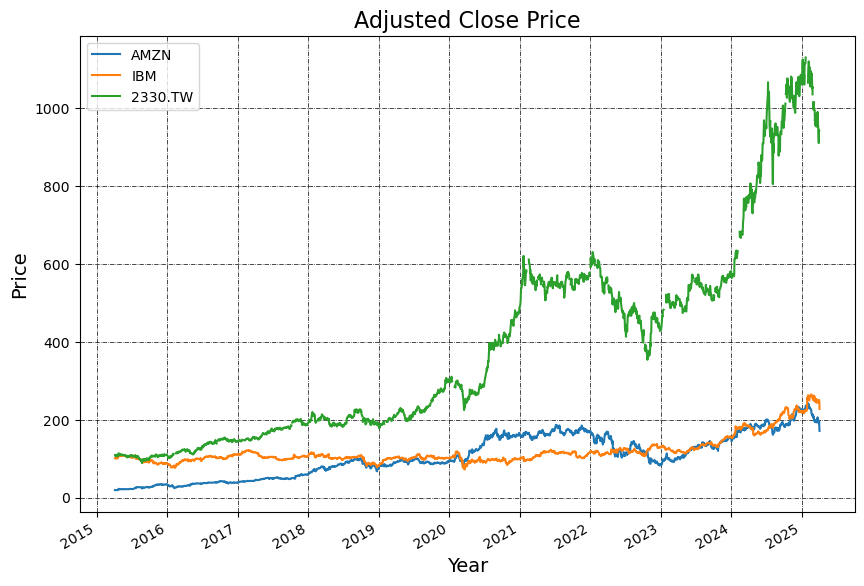

In [18]:
data.plot(figsize=(10,7))
plt.legend()
plt.title("Adjusted Close Price", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [19]:
data.dropna(inplace=True)

In [20]:
correlation_matrix = data.corr()
print("三檔股票之間的相關係數矩陣：")
print(correlation_matrix)

三檔股票之間的相關係數矩陣：
             AMZN       IBM   2330.TW
AMZN     1.000000  0.635968  0.904381
IBM      0.635968  1.000000  0.847814
2330.TW  0.904381  0.847814  1.000000


C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\abbie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29105 (\N{CJK UNIFIED IDEOGRAPH-71B1}) missing from font(s) DejaVu San

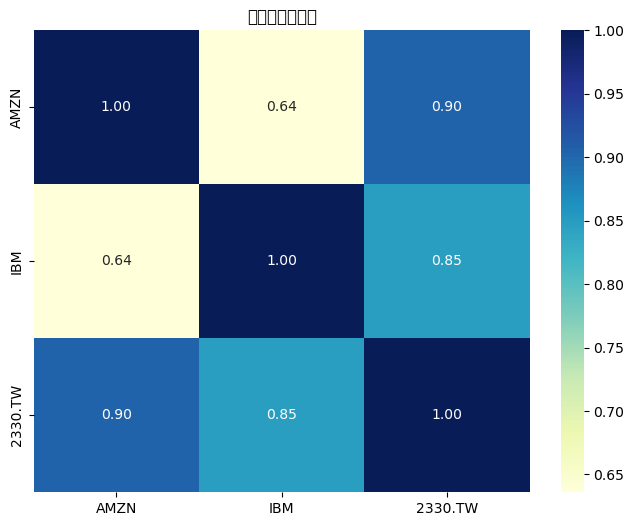

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("相關係數熱力圖")
plt.show()